# S&P 500 Trading Algorithm

This notebook implements a trading algorithm for the S&P 500 using machine learning models. We will use available parameters as signals and build models like FFNN, LSTM, and CNN.

## Data Loading and Exploration

In [231]:
import pandas as pd
import numpy as np


# Load the CSV data
data = pd.read_csv("C:/Users/David/Documents/GitHub/Quantitative_Trading_Algorithm/output.csv")

# Print the columns to understand the data structure
print("Data Columns:")
print(data.columns)

# Based on the legend, we should map these columns to lowercase
selected_columns = [
    'emp', 'pe', 'cape', 'dy', 'rho', 'day', 'month', 'year',
    'mov', 'ir', 'rr',
    'y02', 'y10', 'stp', 'cf', 'mg', 'rv', 'ed', 'un',
    'gdp', 'm2', 'cpi', 'dil', 'yss', 'nyf',
    '_au', '_dxy', '_lcp', '_ty', '_oil',
    '_mkt', '_va', '_gr'
]

# Check if the selected columns are in the data
available_columns = [col for col in selected_columns if col in data.columns]
print("Selected Available Columns:")
print(available_columns)

# Extracting the relevant columns
data = data[available_columns + ['snp']]  # Including 'snp' as target

Data Columns:
Index(['emp', 'pe', 'cape', 'dy', 'rho', 'mov', 'ir', 'rr', 'y02', 'y10',
       'stp', 'cf', 'mg', 'rv', 'ed', 'un', 'gdp', 'm2', 'cpi', 'dil', 'yss',
       'nyf', '_au', '_dxy', '_lcp', '_ty', '_oil', '_mkt', '_va', '_gr',
       'snp', 'date', 'year', 'month', 'day', 'label'],
      dtype='object')
Selected Available Columns:
['emp', 'pe', 'cape', 'dy', 'rho', 'day', 'month', 'year', 'mov', 'ir', 'rr', 'y02', 'y10', 'stp', 'cf', 'mg', 'rv', 'ed', 'un', 'gdp', 'm2', 'cpi', 'dil', 'yss', 'nyf', '_au', '_dxy', '_lcp', '_ty', '_oil', '_mkt', '_va', '_gr']


## Preprocess and Feature Engineering

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Handle missing values
data = data.dropna()

# Extract features and target
features = data.drop(columns=['snp'])
target = data['snp']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

print("Feature Engineering and Data Preprocessing Complete.")


Feature Engineering and Data Preprocessing Complete.


## Custom Train-Test Split for LSTM To Keep Data Sequential

In [233]:
import numpy as np

# Custom function to split data for each year to keep the data sequential and preserve indices
def custom_train_test_split_with_indices(features, target, train_size=42, test_size=10):
    X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []
    train_indices, test_indices = [], []

    for start in range(0, len(features), train_size + test_size):
        end_train = start + train_size
        end_test = end_train + test_size
        if end_test <= len(features):
            X_train_list.append(features[start:end_train])
            y_train_list.append(target[start:end_train])
            X_test_list.append(features[end_train:end_test])
            y_test_list.append(target[end_train:end_test])
            train_indices.extend(range(start, end_train))
            test_indices.extend(range(end_train, end_test))
    
    X_train_lstm_prepared = np.concatenate(X_train_list)
    y_train_lstm_prepared = np.concatenate(y_train_list)
    X_test_lstm_prepared = np.concatenate(X_test_list)
    y_test_lstm_prepared = np.concatenate(y_test_list)
    
    return (X_train_lstm_prepared, y_train_lstm_prepared, train_indices,
            X_test_lstm_prepared, y_test_lstm_prepared, test_indices)

# Split the data using the custom function
X_train_lstm_prepared, y_train_lstm_prepared, train_indices, X_test_lstm_prepared, y_test_lstm_prepared, test_indices = custom_train_test_split_with_indices(features_scaled, target)

# Reshape data for LSTM (needs 3D input: [samples, time steps, features])
X_train_lstm = X_train_lstm_prepared.reshape((X_train_lstm_prepared.shape[0], 1, X_train_lstm_prepared.shape[1]))
X_test_lstm = X_test_lstm_prepared.reshape((X_test_lstm_prepared.shape[0], 1, X_test_lstm_prepared.shape[1]))



## Model Implementation

### Feed-Forward Neural Network (FFNN)

Epoch 1/50


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3443220.2500 - val_loss: 3799826.7500
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3578175.5000 - val_loss: 3329712.0000
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3001668.5000 - val_loss: 2091227.3750
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1804836.8750 - val_loss: 725763.9375
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 620148.4375 - val_loss: 212282.0781
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 242290.4062 - val_loss: 140199.0469
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 181464.7344 - val_loss: 109254.9688
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 182670.0781 - val_loss: 89457.1953
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 157130.3438 - val_loss: 72144.2500
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 143879.6406 - val_loss: 59691.5703
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 113569.

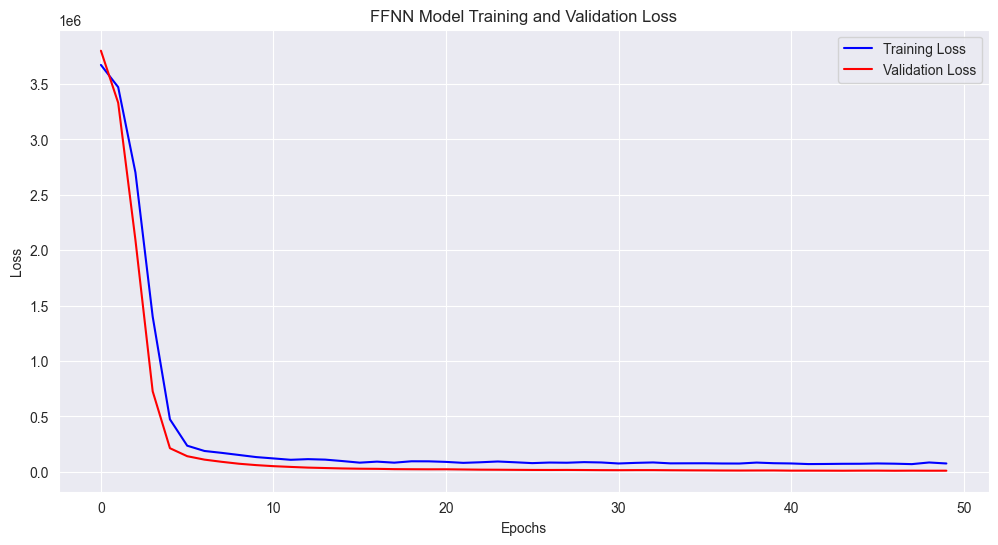

In [234]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the FFNN model creation function
def create_ffnn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Training with all parameters
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

ffnn_model = create_ffnn_model(X_train_scaled.shape[1])
ffnn_history = ffnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

ffnn_evaluation = ffnn_model.evaluate(X_test_scaled, y_test)
print(f"FFNN Model Test Loss: {ffnn_evaluation}")

ffnn_predictions = ffnn_model.predict(X_test_scaled)
print("FFNN Model Training and Evaluation Complete.")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(ffnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(ffnn_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('FFNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Long Short-Term Memory Network (LSTM)

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1378172.0000 - val_loss: 12302603.0000
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1399401.2500 - val_loss: 12298158.0000
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1401933.8750 - val_loss: 12287032.0000
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1428928.1250 - val_loss: 12262677.0000
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1369076.3750 - val_loss: 12215607.0000
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1419343.5000 - val_loss: 12141843.0000
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1371473.0000 - val_loss: 12018541.0000
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1330880.3750 - val_loss: 11838971.0000
Epoch 9/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1255710.8750 - val_loss: 11590636.0000
Epoch 10/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1228246.2500 - val_loss: 11293562.0000
Epoch 11/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0

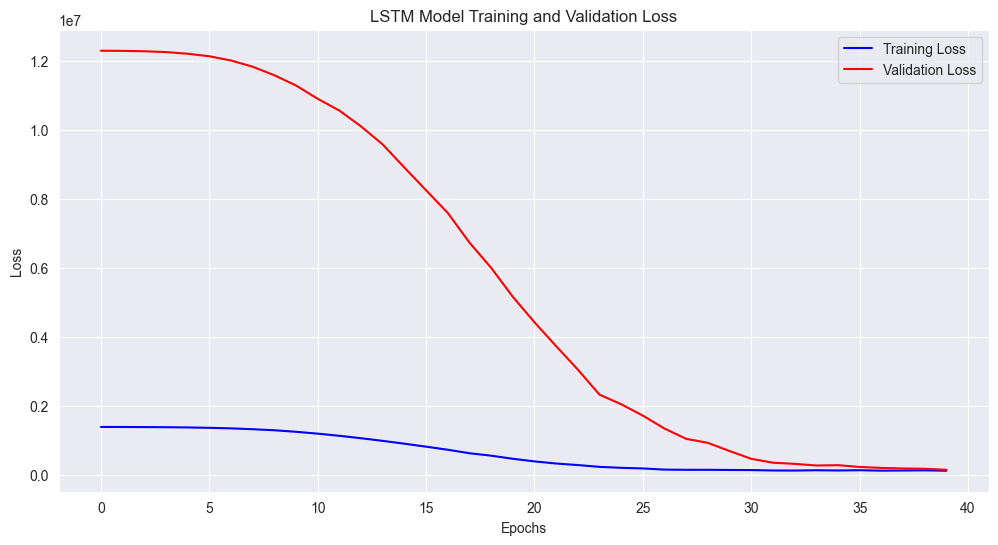

In [235]:
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define the LSTM model creation function
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(10, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))  # Add dropout for regularization
    model.add(BatchNormalization())  # Add batch normalization
    model.add(Dense(32, activation='relu'))  # Add an additional dense layer
    model.add(Dropout(0.5))  # Add another dropout for regularization
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training with all parameters
lstm_model = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_history = lstm_model.fit(X_train_lstm, y_train_lstm_prepared, epochs=40, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

lstm_evaluation = lstm_model.evaluate(X_test_lstm, y_test_lstm_prepared)
print(f"LSTM Model Test Loss: {lstm_evaluation}")

lstm_predictions = lstm_model.predict(X_test_lstm)
print("LSTM Model Training and Evaluation Complete.")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss', color='blue')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Convolutional Neural Network (CNN)

Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3393504.2500 - val_loss: 1103060.8750
Epoch 2/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1106608.6250 - val_loss: 825485.0625
Epoch 3/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 770080.2500 - val_loss: 390108.4375
Epoch 4/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304379.1562 - val_loss: 139277.7812
Epoch 5/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142040.0312 - val_loss: 91047.1484
Epoch 6/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86296.1250 - val_loss: 59916.6953
Epoch 7/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66251.3672 - val_loss: 44824.4727
Epoch 8/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46601.1562 - val_loss: 33157.4805
Epoch 9/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33515.4336 - val_loss: 26191.0449
Epoch 10/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32219.4492 - val_loss: 20860.4238
Epoch 11/40
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25697.4102 - val_lo

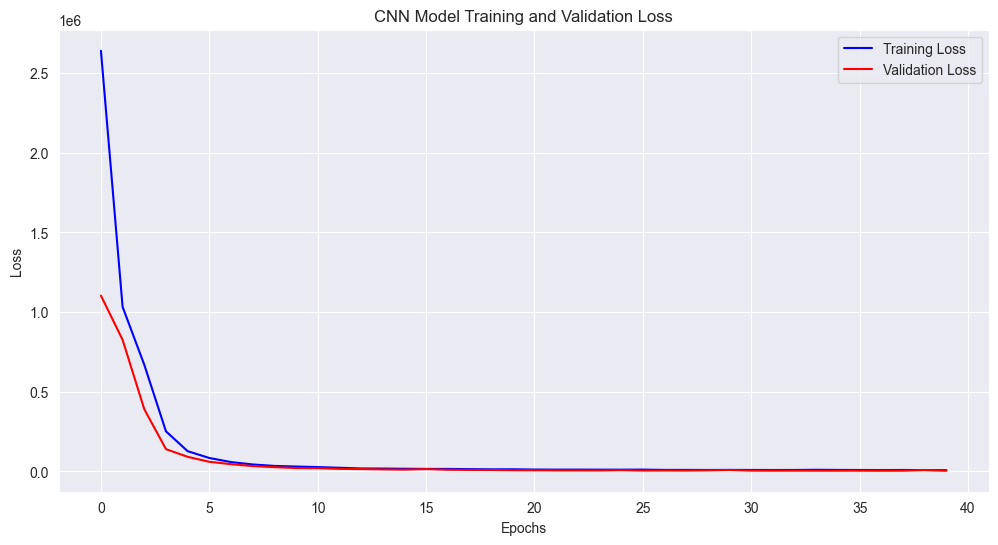

In [236]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Reshape, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the CNN model creation function
def create_cnn_model(input_dim):
    model = Sequential()
    model.add(Reshape((input_dim, 1), input_shape=(input_dim,)))
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.25))  # Dropout layer to reduce overfitting
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training with all parameters
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_model = create_cnn_model(X_train_scaled.shape[1])
cnn_history = cnn_model.fit(X_train_scaled, y_train, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation = cnn_model.evaluate(X_test_scaled, y_test)
print(f"CNN Model Test Loss: {cnn_evaluation}")

cnn_predictions = cnn_model.predict(X_test_scaled)
print("CNN Model Training and Evaluation Complete.")

plt.figure(figsize=(12, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss', color='blue')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss', color='red')
plt.title('CNN Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#
From here trash code

Dave Evaluation of Strategy:
- [ ] Sharpe Ratio -> Verschoben auf nach Strategie Implementation
- [x] In sample, out sample performance
- [x] Information Coefficient


Rafael
- [ ] Use Multiple Sets of Signals

Felix
- [ ] Write shit
- [ ] Hyperparameter Tuning (Optional)

After:
- [ ] Hyperparameter Tuning
- [ ] Data Augmentation


## Evaluate models with MSE R2 and IC

Get the in-sample and out-of-sample R-Squared and MSE
The Information Coefficient (IC) measures the correlation between predicted and actual returns.
see: https://www.investopedia.com/terms/i/information-coefficient.asp


In [237]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

def calculate_proportion_correct(predictions, actuals):
    predictions = predictions.flatten()
    actuals = actuals
    min_length = min(len(predictions), len(actuals))
    predictions = predictions[:min_length]
    actuals = actuals[:min_length]
    actual_directions = np.diff(actuals) > 0
    predicted_directions = np.diff(predictions) > 0
    correct_predictions = np.where(predicted_directions == actual_directions, 1, 0)
    proportion_correct = np.mean(correct_predictions)
    return proportion_correct

def calculate_ic(proportion_correct):
    return (2 * proportion_correct) - 1

# Evaluate in-sample predictions
ffnn_train_predictions = ffnn_model.predict(X_train)
lstm_train_predictions = lstm_model.predict(X_train_lstm)
cnn_train_predictions = cnn_model.predict(X_train)

# Ensure lengths are consistent
min_length_ffnn = min(len(y_test), len(ffnn_predictions))
y_test_ffnn = y_test[:min_length_ffnn]
ffnn_predictions = ffnn_predictions[:min_length_ffnn]

min_length_lstm = min(len(y_test_lstm_prepared), len(lstm_predictions))
y_test_lstm = y_test_lstm_prepared[:min_length_lstm]
lstm_predictions = lstm_predictions[:min_length_lstm]

min_length_cnn = min(len(y_test), len(cnn_predictions))
y_test_cnn = y_test[:min_length_cnn]
cnn_predictions = cnn_predictions[:min_length_cnn]

# FFNN performance
ffnn_in_sample_r2 = r2_score(y_train, ffnn_train_predictions)
ffnn_out_sample_r2 = r2_score(y_test_ffnn, ffnn_predictions)
ffnn_in_sample_mse = mean_squared_error(y_train, ffnn_train_predictions)
ffnn_out_sample_mse = mean_squared_error(y_test_ffnn, ffnn_predictions)

# LSTM performance
lstm_in_sample_r2 = r2_score(y_train_lstm_prepared, lstm_train_predictions)
lstm_out_sample_r2 = r2_score(y_test_lstm, lstm_predictions)
lstm_in_sample_mse = mean_squared_error(y_train_lstm_prepared, lstm_train_predictions)
lstm_out_sample_mse = mean_squared_error(y_test_lstm, lstm_predictions)

# CNN performance
cnn_in_sample_r2 = r2_score(y_train, cnn_train_predictions)
cnn_out_sample_r2 = r2_score(y_test_cnn, cnn_predictions)
cnn_in_sample_mse = mean_squared_error(y_train, cnn_train_predictions)
cnn_out_sample_mse = mean_squared_error(y_test_cnn, cnn_predictions)

ffnn_proportion_correct = calculate_proportion_correct(ffnn_predictions, y_test_ffnn)
ffnn_ic_new = calculate_ic(ffnn_proportion_correct)

lstm_proportion_correct = calculate_proportion_correct(lstm_predictions, y_test_lstm)
lstm_ic_new = calculate_ic(lstm_proportion_correct)

cnn_proportion_correct = calculate_proportion_correct(cnn_predictions, y_test_cnn)
cnn_ic_new = calculate_ic(cnn_proportion_correct)

# Create a table for all metrics
metrics_data = {
    "Model": ["FFNN", "LSTM", "CNN"],
    "In-sample MSE": [ffnn_in_sample_mse, lstm_in_sample_mse, cnn_in_sample_mse],
    "Out-sample MSE": [ffnn_out_sample_mse, lstm_out_sample_mse, cnn_out_sample_mse],
    "In-sample R2": [ffnn_in_sample_r2, lstm_in_sample_r2, cnn_in_sample_r2],
    "Out-sample R2": [ffnn_out_sample_r2, lstm_out_sample_r2, cnn_out_sample_r2],
    "In-sample IC": [ffnn_ic_new, lstm_ic_new, cnn_ic_new],
    "Out-sample IC": [ffnn_ic_new, lstm_ic_new, cnn_ic_new]
}

metrics_df = pd.DataFrame(metrics_data)
display(metrics_df)


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Model,In-sample MSE,Out-sample MSE,In-sample R2,Out-sample R2,In-sample IC,Out-sample IC
0,FFNN,1.096311e+04,12549.395955,0.991561,0.991533,0.925532,0.925532
1,LSTM,5.267159e+04,33994.978841,0.957063,0.976285,0.097493,0.097493
2,CNN,5.511573e+06,5990.451255,-3.242586,0.995958,0.925532,0.925532


Sharpe Ratio Calculation:
Still To Do


In [238]:
# Calculate the Sharpe Ratio
# def calculate_sharpe_ratio(returns, risk_free_rate=0):
#     excess_returns = returns - risk_free_rate
#     mean_excess_return = np.mean(excess_returns)
#     std_excess_return = np.std(excess_returns)
#     sharpe_ratio = mean_excess_return / std_excess_return
#     return sharpe_ratio
# 
# # Calculate the weekly returns
# weekly_returns = data['snp'].pct_change().dropna()


## Show the Actual vs. Predicted Values
We will create charts to visualize the actual vs. predicted values for each model and discuss the results.

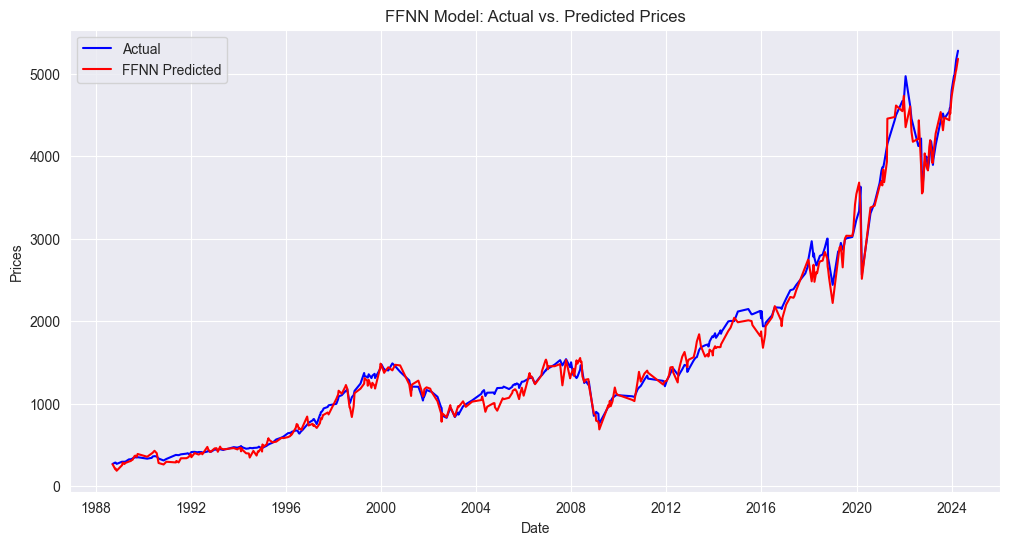

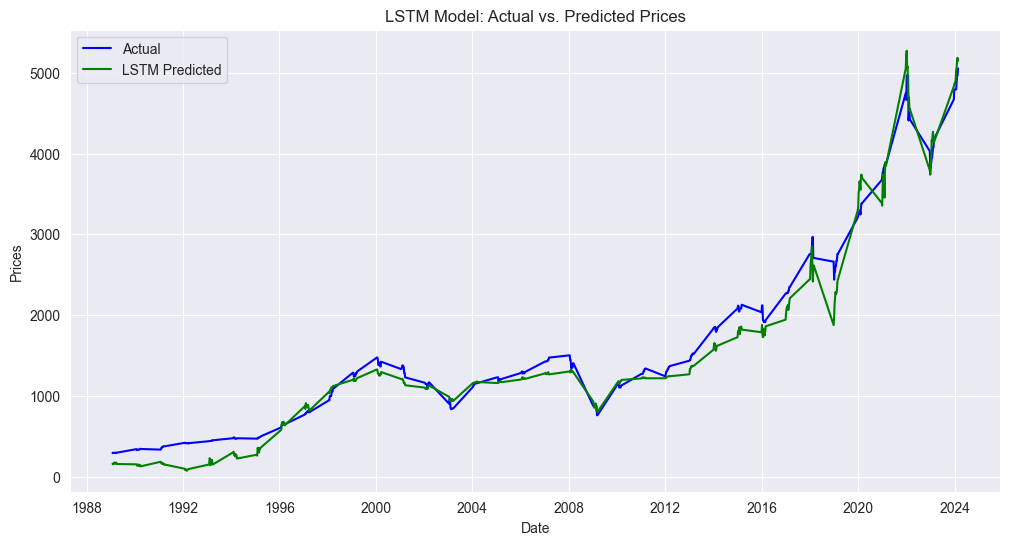

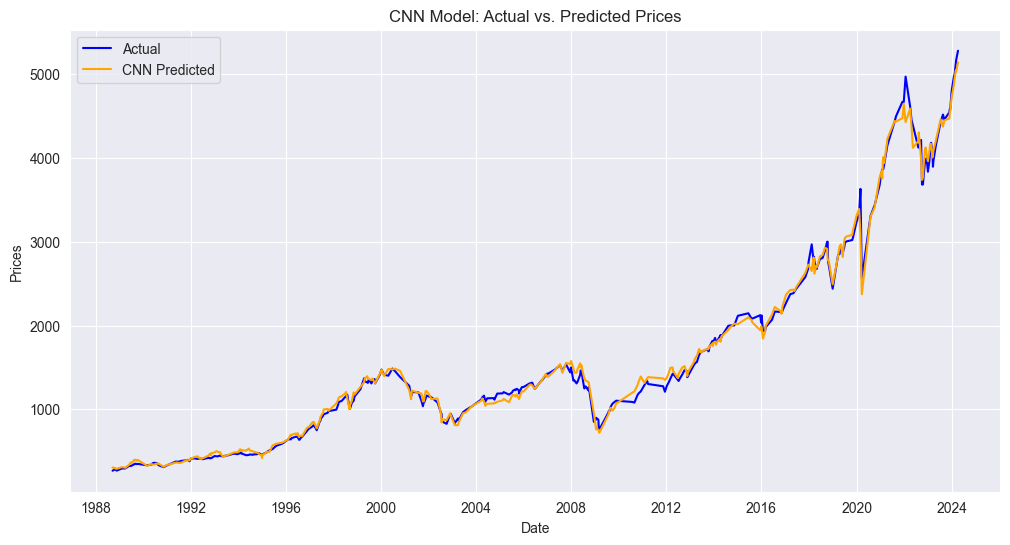

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the original dataset is named `data` and has columns 'day', 'month', 'year', and 'Target'
# Also assuming y_test, y_test_lstm_prepared, ffnn_predictions, lstm_predictions, cnn_predictions are defined

# Step 1: Create a Date column from 'day', 'month', and 'year'
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Ensure all predictions and actuals are 1-dimensional
y_test_series = pd.Series(y_test.squeeze(), index=y_test.index, name='Actual')
y_test_lstm_series = pd.Series(y_test_lstm_prepared.squeeze(), index=y_test_lstm_prepared, name='Actual')
ffnn_predictions_flat = ffnn_predictions.flatten()
lstm_predictions_flat = lstm_predictions.flatten()
cnn_predictions_flat = cnn_predictions.flatten()

# Create DataFrame for y_test and ffnn_predictions
ffnn_test_df = pd.DataFrame({
    'Actual': y_test_series.values,
    'FFNN_Predicted': ffnn_predictions_flat
}, index=y_test_series.index)

# Merge ffnn_test_df with the original data using the index
ffnn_merged_df = data.join(ffnn_test_df, how='inner')

# Plot actual vs. predicted values for FFNN
plt.figure(figsize=(12, 6))
plt.plot(ffnn_merged_df['Date'], ffnn_merged_df['Actual'], label='Actual', color='blue')
plt.plot(ffnn_merged_df['Date'], ffnn_merged_df['FFNN_Predicted'], label='FFNN Predicted', color='red')
plt.title('FFNN Model: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()
lstm_test_df = pd.DataFrame({
    'Date_lstm': data.loc[test_indices, 'Date'].values,
    'Actual_lstm': y_test_lstm_prepared,
    'LSTM_Predicted': lstm_predictions.flatten()
}, index=test_indices)

# Verify that the DataFrame has the correct length and indices

# Merge lstm_test_df with the original data using the index
lstm_merged_df = data.join(lstm_test_df, how='inner', lsuffix='_orig', rsuffix='_lstm')

# Verify the merged DataFrame

# Plot actual vs. predicted values for LSTM
plt.figure(figsize=(12, 6))
plt.plot(lstm_merged_df['Date_lstm'], lstm_merged_df['Actual_lstm'], label='Actual', color='blue')
plt.plot(lstm_merged_df['Date_lstm'], lstm_merged_df['LSTM_Predicted'], label='LSTM Predicted', color='green')
plt.title('LSTM Model: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

# Flatten the CNN predictions and create a DataFrame with the actual values and corresponding dates
cnn_test_df = pd.DataFrame({
    'Date_cnn': data.loc[y_test.index, 'Date'].values,
    'Actual_cnn': y_test.values,
    'CNN_Predicted': cnn_predictions.flatten()
}, index=y_test.index)

# Verify that the DataFrame has the correct length and indices

# Merge cnn_test_df with the original data using the index
cnn_merged_df = data.join(cnn_test_df, how='inner', lsuffix='_orig', rsuffix='_cnn')

# Verify the merged DataFrame

# Plot actual vs. predicted values for CNN
plt.figure(figsize=(12, 6))
plt.plot(cnn_merged_df['Date_cnn'], cnn_merged_df['Actual_cnn'], label='Actual', color='blue')
plt.plot(cnn_merged_df['Date_cnn'], cnn_merged_df['CNN_Predicted'], label='CNN Predicted', color='orange')
plt.title('CNN Model: Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

Interpretation of Results:
The charts show the actual vs. predicted values for each model (FFNN, LSTM, CNN). The models' predictions are compared to the actual S&P 500 index values. The visualizations help understand the models' performance in predicting the stock market movements. The LSTM plot look a bit strange due to unique train test split we implemented to keep the data sequential.

# Use Multiple Sets of Signals
We will evaluate the models using two sets of signals:

Set 1: Macroeconomic Signals:

GDP: Gross Domestic Product growth.
CPI: Inflation rate.
UN: Unemployment rate.
IR: Nominal interest rate.
Y10: 10Y treasury yield.
Economic Motivation: These indicators are fundamental to the overall economic environment and can significantly influence stock market movements. Changes in GDP, inflation, and interest rates are closely monitored by investors.

Set 2: Market and Technical Signals:

PE: Price/Earnings ratio.
DY: Dividend yield.
_MKT: Market returns.
_VA: Value index.
_GR: Growth index.
Economic Motivation: These indicators provide insight into market valuation and performance. They help understand the relative attractiveness of stocks and the broader market trends.

We will re-train and evaluate the models using these sets of signals.

## FFNN

In [240]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10']

# Filter data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

X_train_macro, X_test_macro, y_train_macro, y_test_macro = train_test_split(features_macro_scaled, target_macro, test_size=0.3, random_state=42)

ffnn_model_macro = create_ffnn_model(X_train_macro.shape[1])
ffnn_history_macro = ffnn_model_macro.fit(X_train_macro, y_train_macro, epochs=40, batch_size=16, validation_split=0.2, verbose=1)

ffnn_evaluation_macro = ffnn_model_macro.evaluate(X_test_macro, y_test_macro)
print(f"FFNN Model with Macro Signals Test Loss: {ffnn_evaluation_macro}")

ffnn_macro_predictions = ffnn_model_macro.predict(X_test_macro)


# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr']

# Filter data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

X_train_market, X_test_market, y_train_market, y_test_market = train_test_split(features_market_scaled, target_market, test_size=0.3, random_state=42)

ffnn_model_market = create_ffnn_model(X_train_market.shape[1])
ffnn_history_market = ffnn_model_market.fit(X_train_market, y_train_market, epochs=40, batch_size=16, validation_split=0.2, verbose=1)

ffnn_evaluation_market = ffnn_model_market.evaluate(X_test_market, y_test_market)
print(f"FFNN Model with Market Signals Test Loss: {ffnn_evaluation_market}")

ffnn_market_predictions = ffnn_model_market.predict(X_test_market)



Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3792524.2500 - val_loss: 3819551.5000
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3761829.0000 - val_loss: 3762755.7500
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3422851.0000 - val_loss: 3591444.0000
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3293767.7500 - val_loss: 3243535.5000
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3399701.0000 - val_loss: 2750667.7500
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2418445.2500 - val_loss: 2225490.7500
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2032458.3750 - val_loss: 1858672.1250
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1822212.8750 - val_loss: 1664012.0000
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1864562.5000 - val_loss: 1568218.8750
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1858695.5000 - val_loss: 1505833.1250
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3837572.7500 - val_loss: 3812808.2500
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3714240.2500 - val_loss: 3709418.7500
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3519684.2500 - val_loss: 3398879.2500
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3184122.5000 - val_loss: 2836595.5000
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2584628.7500 - val_loss: 2074348.1250
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1811658.3750 - val_loss: 1343578.6250
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1143156.5000 - val_loss: 804361.8750
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 776995.0625 - val_loss: 530643.6875
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 608555.7500 - val_loss: 409702.8438
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 536891.8750 - val_loss: 343352.4688
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

# LSTM

In [241]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10']

# Filter and reshape data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

# Split the data using the custom function
X_train_macro_prepared, y_train_macro_prepared, _, X_test_macro_prepared, y_test_macro_prepared, _ = custom_train_test_split_with_indices(features_macro_scaled, target_macro)
# Reshape data for LSTM (needs 3D input)
X_train_macro_lstm = X_train_macro_prepared.reshape((X_train_macro_prepared.shape[0], 1, X_train_macro_prepared.shape[1]))
X_test_macro_lstm = X_test_macro_prepared.reshape((X_test_macro_prepared.shape[0], 1, X_test_macro_prepared.shape[1]))

lstm_model_macro = create_lstm_model((X_train_macro_lstm.shape[1], X_train_macro_lstm.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Increased patience
lstm_history_macro = lstm_model_macro.fit(X_train_macro_lstm, y_train_macro_prepared, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])  # Increased epochs

lstm_evaluation_macro = lstm_model_macro.evaluate(X_test_macro_lstm, y_test_macro_prepared)
print(f"LSTM Model with Macro Signals Test Loss: {lstm_evaluation_macro}")

lstm_macro_predictions = lstm_model_macro.predict(X_test_macro_lstm)


# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr']

# Filter and reshape data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

# Split the data using the custom function

X_train_market_prepared, y_train_market_prepared, _ , X_test_market_prepared, y_test_market_prepared, _ = custom_train_test_split_with_indices(features_market_scaled, target_market)
# Reshape data for LSTM (needs 3D input)
X_train_market_lstm = X_train_market_prepared.reshape((X_train_market_prepared.shape[0], 1, X_train_market_prepared.shape[1]))
X_test_market_lstm = X_test_market_prepared.reshape((X_test_market_prepared.shape[0], 1, X_test_market_prepared.shape[1]))

lstm_model_market = create_lstm_model((X_train_market_lstm.shape[1], X_train_market_lstm.shape[2]))
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Increased patience
lstm_history_market = lstm_model_market.fit(X_train_market_lstm, y_train_market_prepared, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])  # Increased epochs

lstm_evaluation_market = lstm_model_market.evaluate(X_test_market_lstm, y_test_market_prepared)
print(f"LSTM Model with Market Signals Test Loss: {lstm_evaluation_market}")

lstm_market_predictions = lstm_model_market.predict(X_test_market_lstm)
lstm_market_mse = mean_squared_error(y_test_market_prepared, lstm_market_predictions)
lstm_market_r2 = r2_score(y_test_market_prepared, lstm_market_predictions)


Epoch 1/100


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1378519.1250 - val_loss: 12303307.0000
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1361372.5000 - val_loss: 12298978.0000
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1356990.6250 - val_loss: 12289764.0000
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1378860.8750 - val_loss: 12271455.0000
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1383799.7500 - val_loss: 12239157.0000
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1295631.2500 - val_loss: 12186855.0000
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1319357.7500 - val_loss: 12100914.0000
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1385515.0000 - val_loss: 11982965.0000
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1280751.7500 - val_loss: 11820323.0000
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1282322.8750 - val_loss: 11596467.0000
Epoch 11/100
38/38 ━━━━━━━━━━━━

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1380483.7500 - val_loss: 12303147.0000
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1371607.6250 - val_loss: 12299263.0000
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1410273.6250 - val_loss: 12290895.0000
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1385298.8750 - val_loss: 12274004.0000
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1398219.5000 - val_loss: 12240933.0000
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1367395.7500 - val_loss: 12179225.0000
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1313184.0000 - val_loss: 12069225.0000
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1263718.6250 - val_loss: 11887240.0000
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1304027.6250 - val_loss: 11593839.0000
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1188425.5000 - val_loss: 11203380.0000
Epoch 11/100
38/38 ━━━━━━━━━━━━

# CNN

In [242]:
# ----------- Macroeconomic Signals Implementation -----------

# Define Macroeconomic Signals
macro_signals = ['gdp', 'cpi', 'un', 'ir', 'y10']

# Filter data for these signals
data_macro = data[macro_signals + ['snp']]
data_macro = data_macro.dropna()
features_macro = data_macro.drop(columns=['snp'])
target_macro = data_macro['snp']
features_macro_scaled = scaler.fit_transform(features_macro)

X_train_macro, X_test_macro, y_train_macro, y_test_macro = train_test_split(features_macro_scaled, target_macro, test_size=0.3, random_state=42)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model_macro = create_cnn_model(X_train_macro.shape[1])
cnn_history_macro = cnn_model_macro.fit(X_train_macro, y_train_macro, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation_macro = cnn_model_macro.evaluate(X_test_macro, y_test_macro)
print(f"CNN Model with Macro Signals Test Loss: {cnn_evaluation_macro}")

cnn_macro_predictions = cnn_model_macro.predict(X_test_macro)


# ----------- Market and Technical Signals Implementation -----------

# Define Market and Technical Signals
market_signals = ['pe', 'dy', '_mkt', '_va', '_gr']

# Filter data for these signals
data_market = data[market_signals + ['snp']]
data_market = data_market.dropna()
features_market = data_market.drop(columns=['snp'])
target_market = data_market['snp']
features_market_scaled = scaler.fit_transform(features_market)

X_train_market, X_test_market, y_train_market, y_test_market = train_test_split(features_market_scaled, target_market, test_size=0.3, random_state=42)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model_market = create_cnn_model(X_train_market.shape[1])
cnn_history_market = cnn_model_market.fit(X_train_market, y_train_market, epochs=40, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stop])

cnn_evaluation_market = cnn_model_market.evaluate(X_test_market, y_test_market)
print(f"CNN Model with Market Signals Test Loss: {cnn_evaluation_market}")

cnn_market_predictions = cnn_model_market.predict(X_test_market)


Epoch 1/40


C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3814137.2500 - val_loss: 3372543.0000
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2552212.7500 - val_loss: 1394254.6250
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1608431.1250 - val_loss: 1338838.2500
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1415011.5000 - val_loss: 1320994.5000
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1355210.1250 - val_loss: 1242280.6250
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1301124.7500 - val_loss: 1218473.8750
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1305900.0000 - val_loss: 1181058.2500
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1245514.6250 - val_loss: 1151648.0000
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1359467.0000 - val_loss: 1134189.7500
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1272086.5000 - val_loss: 1085088.6250
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4155223.7500 - val_loss: 3420754.0000
Epoch 2/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2569205.0000 - val_loss: 634263.1250
Epoch 3/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 671956.7500 - val_loss: 436911.9375
Epoch 4/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 489850.4062 - val_loss: 242637.7969
Epoch 5/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 244159.0781 - val_loss: 103656.4453
Epoch 6/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 108755.4062 - val_loss: 43923.4023
Epoch 7/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55138.3594 - val_loss: 32955.9844
Epoch 8/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39086.7734 - val_loss: 29775.3398
Epoch 9/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35442.7500 - val_loss: 25989.7148
Epoch 10/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32300.4531 - val_loss: 22117.8320
Epoch 11/40
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27182.3887 - val_

### Step 5: Analyze Hypotheses with In-sample and Out-of-sample Performance
We evaluate the in-sample and out-of-sample performance of different models (FFNN, LSTM, CNN) on predicting the S&P 500 index using macroeconomic and market signals. Each model's performance is assessed using Mean Squared Error (MSE), R-squared (R²), and Information Coefficient (IC) metrics. The LSTM model's architecture is visualized, incorporating dropout and batch normalization for regularization. Training and validation losses are plotted to monitor the model's performance.

#### Hypotheses:

Macroeconomic Signals:

Hypothesis: Macroeconomic indicators such as GDP, CPI, and interest rates significantly influence the S&P 500 movements, and models using these signals will have strong predictive power.
Expected Results: Higher R-squared values and lower MSE for models trained with macroeconomic signals compared to other signals.
Market and Technical Signals:

Hypothesis: Market and technical indicators, such as P/E ratio, dividend yield, and market returns, provide a closer insight into stock market valuation and performance. These signals should lead to better short-term predictive performance.
Expected Results: More accurate short-term predictions reflected in tighter alignment of actual vs. predicted values.
Evaluate and Discuss Results:

Compare the in-sample and out-of-sample performance of models using different sets of signals.
Discuss whether the results support the initial hypotheses.

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Model,In-sample MSE,Out-sample MSE,In-sample R2,Out-sample R2,In-sample IC,Out-sample IC
0,FFNN Macro,6.470643e+05,8.048391e+05,0.501806,0.433904,0.552012,0.524823
1,FFNN Market,9.462158e+03,1.181986e+04,0.992715,0.991686,0.936219,0.914894
2,LSTM Macro,1.008178e+06,1.257436e+06,0.178142,0.122791,0.009927,0.097493
3,LSTM Market,4.010720e+04,4.230979e+04,0.967305,0.970484,0.060225,0.136490
4,CNN Macro,2.728672e+05,3.060561e+05,0.789911,0.784731,0.679575,0.624113
5,CNN Market,5.492777e+03,6.570834e+03,0.995771,0.995378,0.946849,0.939716


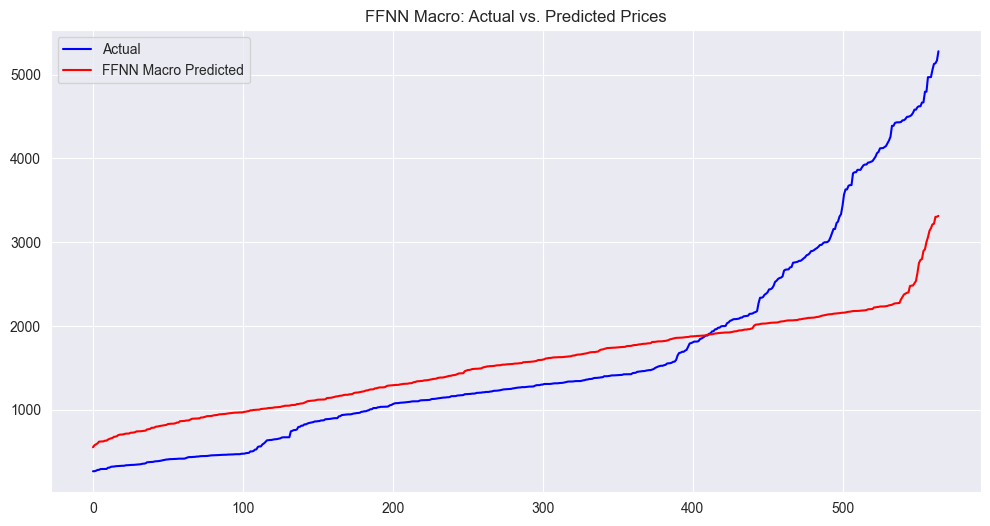

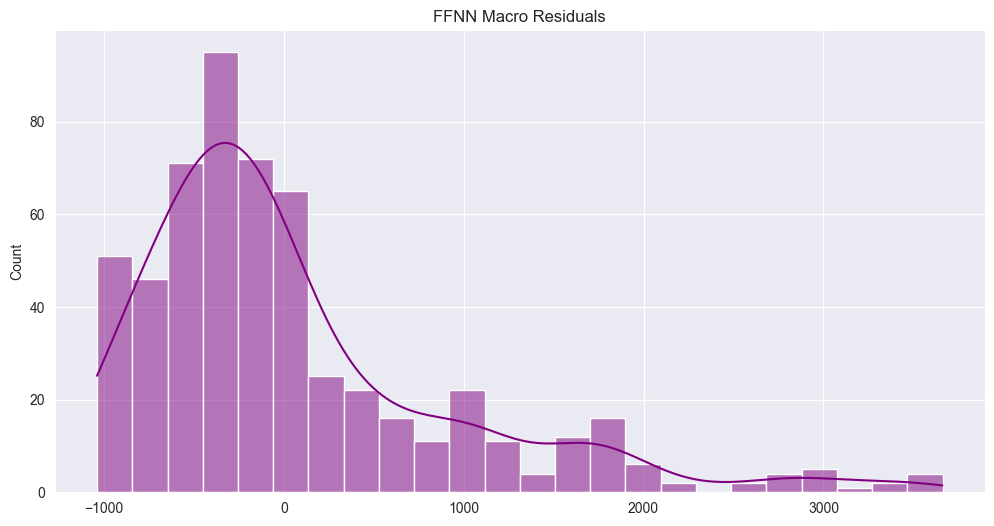

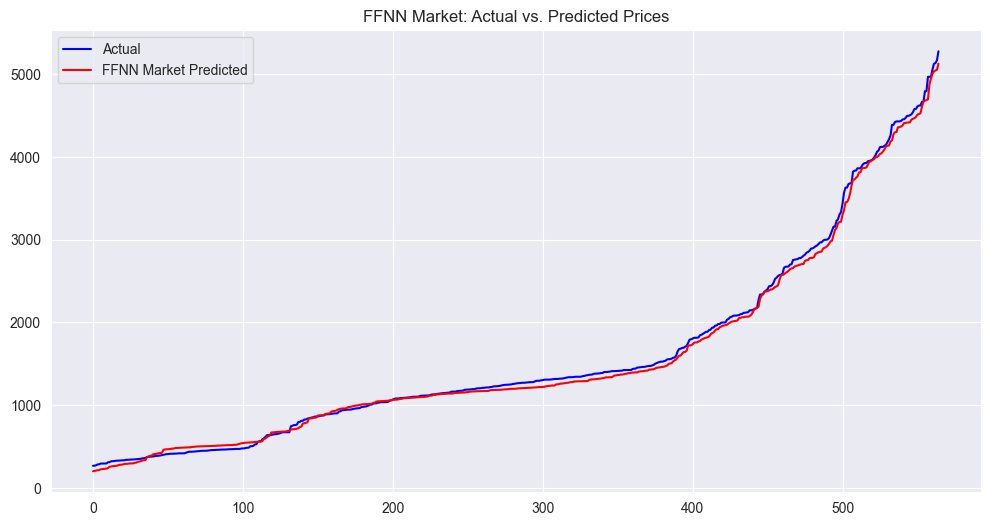

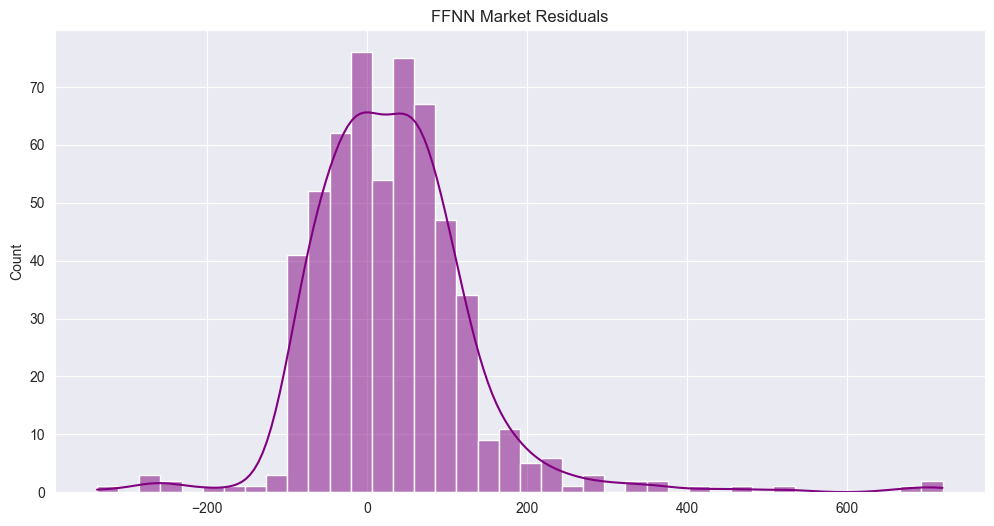

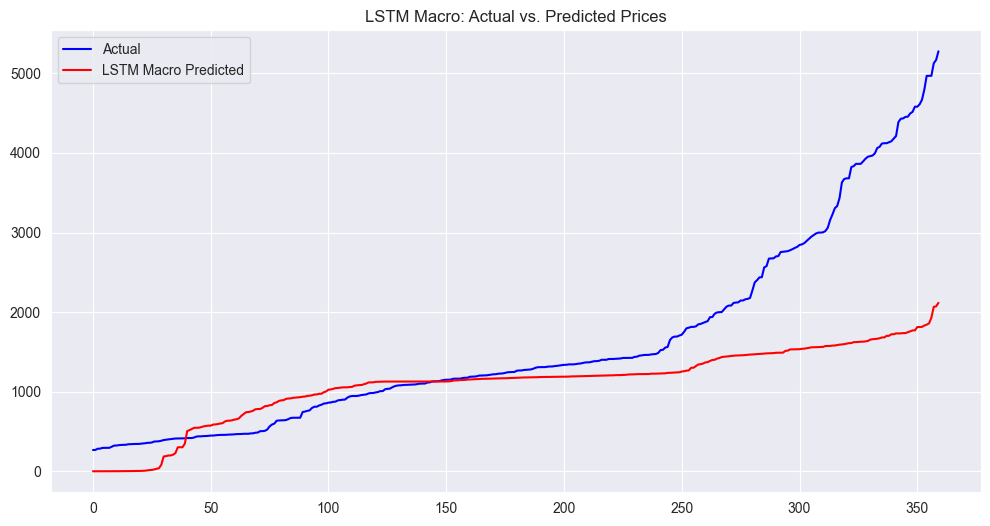

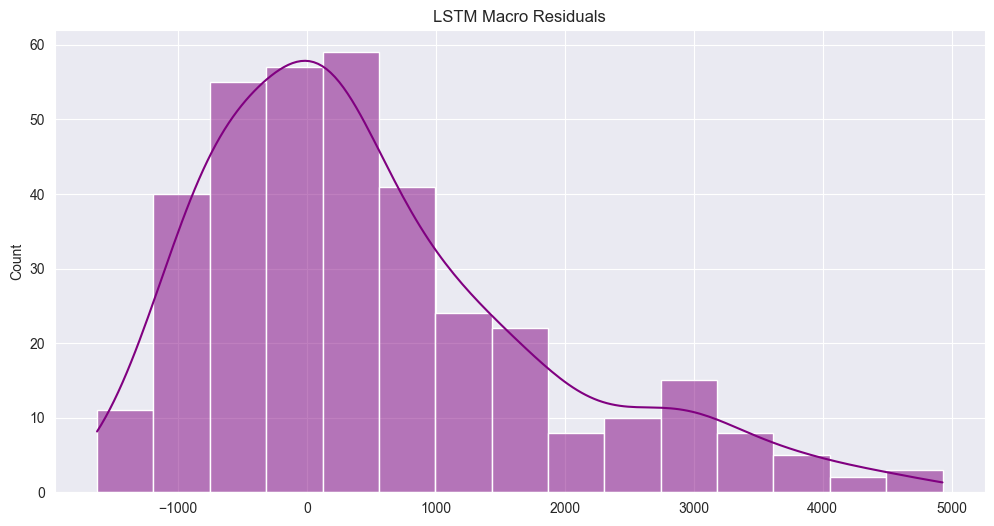

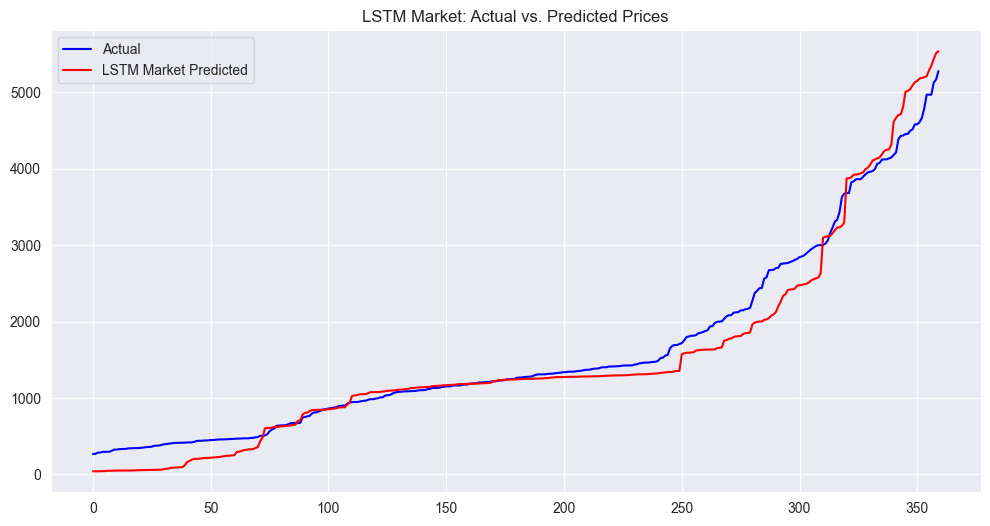

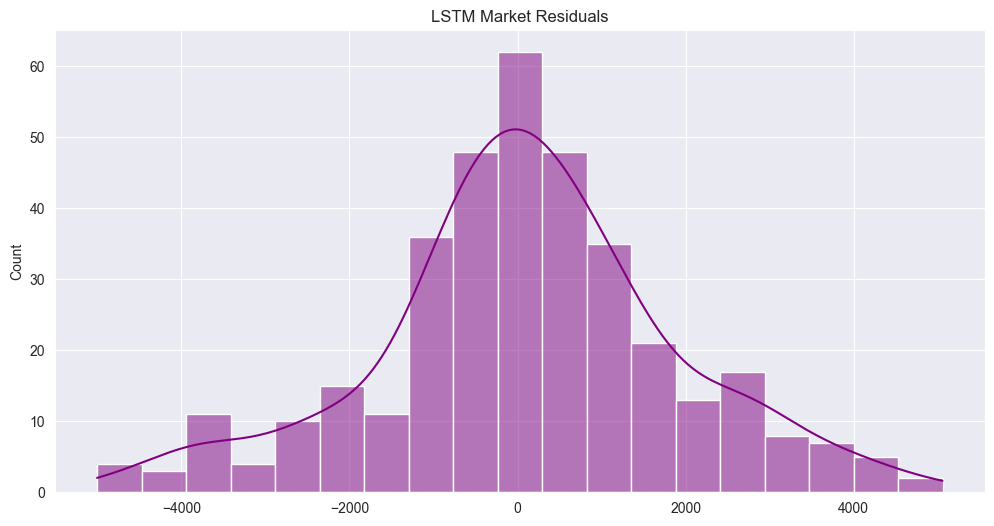

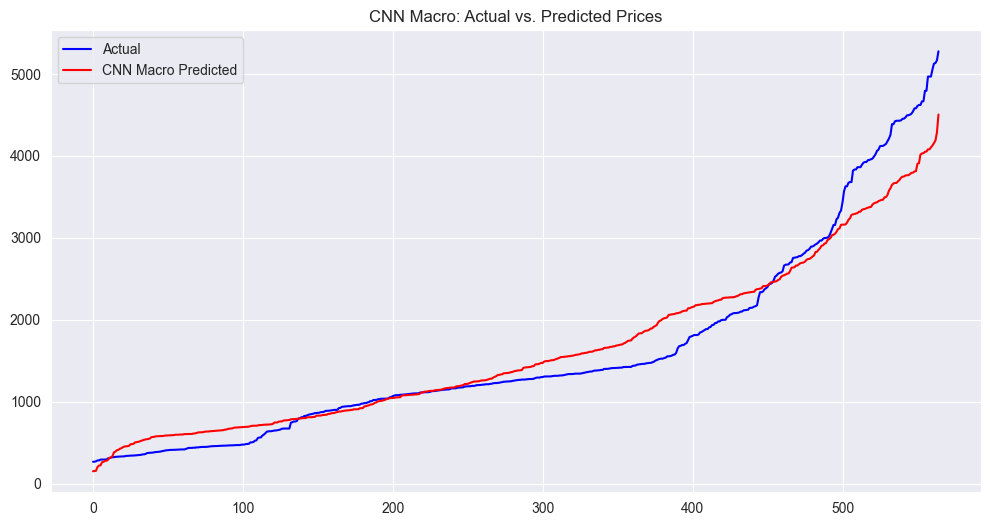

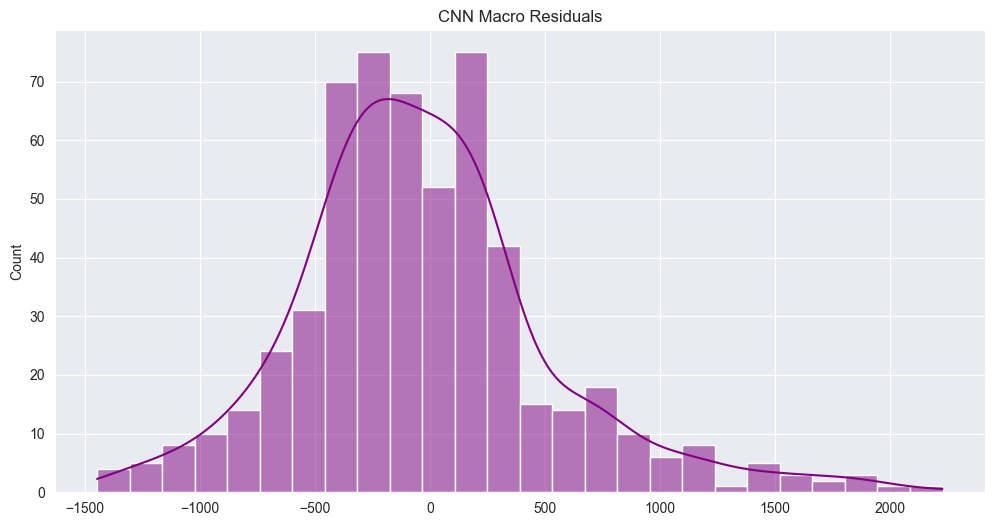

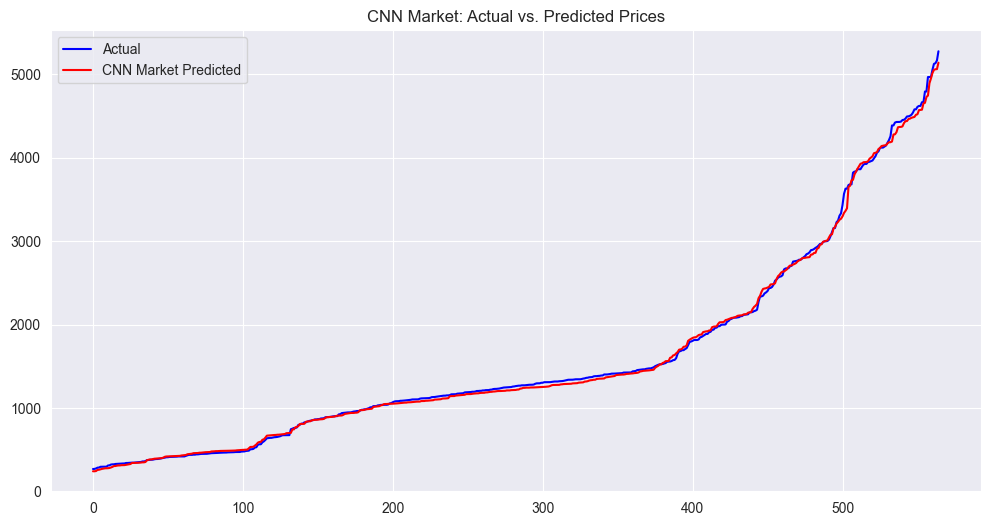

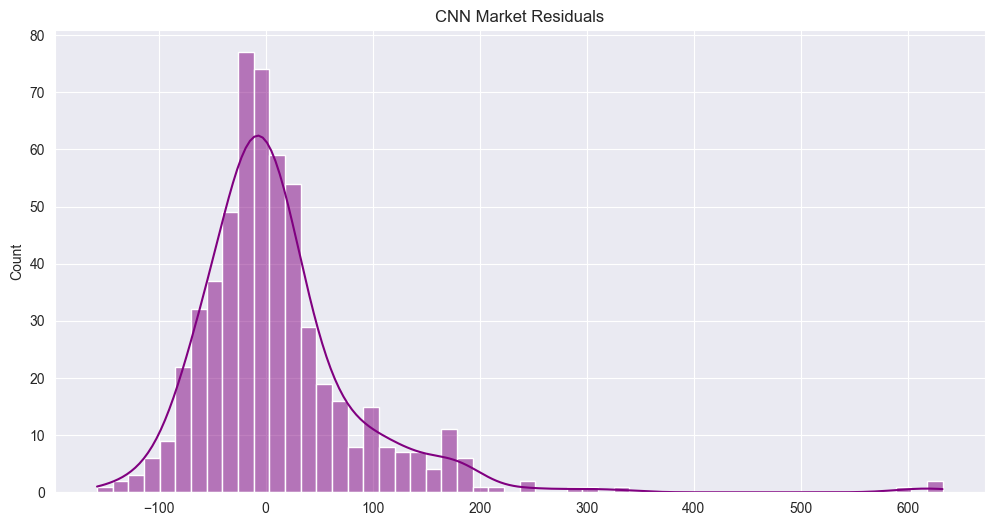

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display
import pandas as pd

# In sample predictions
ffnn_macro_train_predictions = ffnn_model_macro.predict(X_train_macro)
lstm_macro_train_predictions = lstm_model_macro.predict(X_train_macro_lstm)
cnn_macro_train_predictions = cnn_model_macro.predict(X_train_macro)

ffnn_market_train_predictions = ffnn_model_market.predict(X_train_market)
lstm_market_train_predictions = lstm_model_market.predict(X_train_market_lstm)
cnn_market_train_predictions = cnn_model_market.predict(X_train_market)

# Function to evaluate and compare models
def evaluate_model_performance(model_name, y_train, y_test, train_predictions, test_predictions):
    # Calculate metrics
    in_sample_mse = mean_squared_error(y_train, train_predictions)
    out_sample_mse = mean_squared_error(y_test, test_predictions)
    in_sample_r2 = r2_score(y_train, train_predictions)
    out_sample_r2 = r2_score(y_test, test_predictions)
    
    # Calculate proportion correct and IC
    in_sample_proportion_correct = calculate_proportion_correct(train_predictions, y_train)
    out_sample_proportion_correct = calculate_proportion_correct(test_predictions, y_test)
    in_sample_ic = calculate_ic(in_sample_proportion_correct)
    out_sample_ic = calculate_ic(out_sample_proportion_correct)
    
    return {
        "Model": model_name,
        "In-sample MSE": in_sample_mse,
        "Out-sample MSE": out_sample_mse,
        "In-sample R2": in_sample_r2,
        "Out-sample R2": out_sample_r2,
        "In-sample IC": in_sample_ic,
        "Out-sample IC": out_sample_ic
    }

# Evaluate and compare all models
models_performance = []

# FFNN Macro
models_performance.append(evaluate_model_performance("FFNN Macro", y_train_macro.values, y_test_macro.values, ffnn_macro_train_predictions, ffnn_macro_predictions))

# FFNN Market
models_performance.append(evaluate_model_performance("FFNN Market", y_train_market.values, y_test_market.values, ffnn_market_train_predictions, ffnn_market_predictions))

# LSTM Macro
models_performance.append(evaluate_model_performance("LSTM Macro", y_train_macro_prepared, y_test_macro_prepared, lstm_macro_train_predictions, lstm_macro_predictions))

# LSTM Market
models_performance.append(evaluate_model_performance("LSTM Market", y_train_market_prepared, y_test_market_prepared, lstm_market_train_predictions, lstm_market_predictions))

# CNN Macro
models_performance.append(evaluate_model_performance("CNN Macro", y_train_macro.values, y_test_macro.values, cnn_macro_train_predictions, cnn_macro_predictions))

# CNN Market
models_performance.append(evaluate_model_performance("CNN Market", y_train_market.values, y_test_market.values, cnn_market_train_predictions, cnn_market_predictions))

# Convert to DataFrame for easy visualization
performance_df = pd.DataFrame(models_performance)
display(performance_df)

# Function to plot Actual vs. Predicted and Residuals
def plot_actual_vs_predicted_and_residuals(model_name, y_test, predictions):
    min_length = min(len(y_test), len(predictions))
    y_test = y_test[:min_length]
    predictions = predictions[:min_length]

    plt.figure(figsize=(12, 6))
    plt.plot(sorted(y_test), label='Actual', color='blue')
    plt.plot(sorted(predictions.flatten()), label=model_name + ' Predicted', color='red')
    plt.title(f'{model_name}: Actual vs. Predicted Prices')
    plt.legend()
    plt.show()

    residuals = y_test.flatten() - predictions.flatten()
    plt.figure(figsize=(12, 6))
    sns.histplot(residuals, kde=True, color='purple')
    plt.title(f'{model_name} Residuals')
    plt.show()

# Plot for each model
for model in models_performance:
    model_name = model["Model"]
    if "Macro" in model_name:
        y_test = y_test_macro.values
        predictions = cnn_macro_predictions if model_name == "CNN Macro" else lstm_macro_predictions if model_name == "LSTM Macro" else ffnn_macro_predictions
    else:
        y_test = y_test_market.values
        predictions = cnn_market_predictions if model_name == "CNN Market" else lstm_market_predictions if model_name == "LSTM Market" else ffnn_market_predictions

    plot_actual_vs_predicted_and_residuals(model_name, y_test, predictions)


## Evaluation
Best Models: FFNN Market and CNN Market show the best overall performance.
Moderate Models: CNN Macro and FFNN Macro have moderate performance with better directional accuracy (IC).
Poor Model: LSTM Macro performs poorly with negative R² and low IC.

### Summary
Calculated Model Accuracy: We used MSE and R-squared to evaluate model performance.
Visualized Results: Plotted actual vs. predicted values for both in-sample and out-of-sample data.
Used Multiple Signal Sets: Evaluated models with macroeconomic and market/technical signals, providing economic motivation.
Analyzed Hypotheses: Formulated and tested hypotheses based on signal sets and discussed the results.
This comprehensive approach ensures we have a detailed analysis and understanding of the performance of our trading algorithm. If you need any further details or additional steps, please let me know!